# Random Variables

A random variable, X,  is a variable quantity (i.e., not necessarily fixed) whose possible values depend on a set of random events. Like a traditional mathematical variable, its value is unknown a priori (before the outcome of the events is known)
A random variable's possible values might represent the possible outcomes of a yet to occur event. This event  can take on a range of values, each with an associated probability, giving the random variable a probability distribution


For example, the value of a roll of a die is a random variable. This variable,X, can take values 1 - 6, each with a probability of ⅙, but it’s exact value is unknown till the die roll is actually performed.

Random variables can be separated into two different classes:
 - Discrete random variables
 - Continuous random variables


### Discrete Random Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from __future__ import division

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

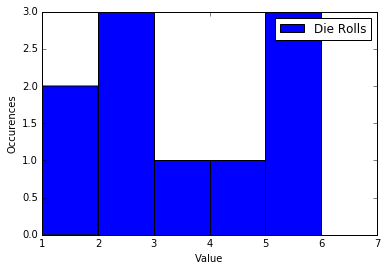

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])
plt.show()

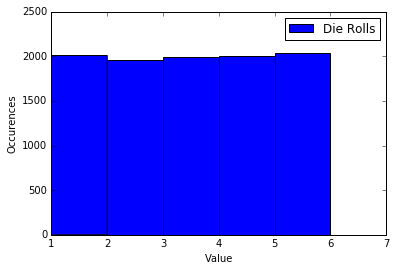

In [4]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);
plt.show()

A random variable is independent and identically distributed (i.i.d) if each random variable has the same probability distribution as the others and all are mutually independent, i.e. outcome of one doesn’t affect the other. For example, random variables representing die rolls are i.i.d. The value of one die roll does not affect the value of next die roll.
Future returns on a stock can be denoted as random variables because their value is unknown in the present, and they can take a range values with some probability.  

In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

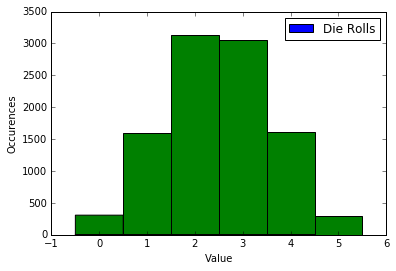

In [8]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);
plt.show()

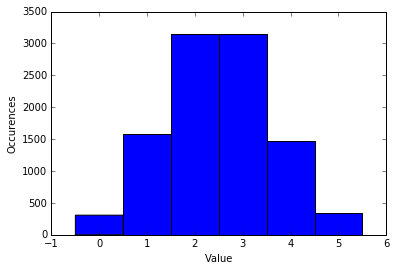

In [9]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

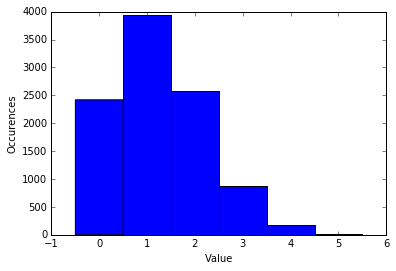

In [10]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

In [11]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

In [12]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

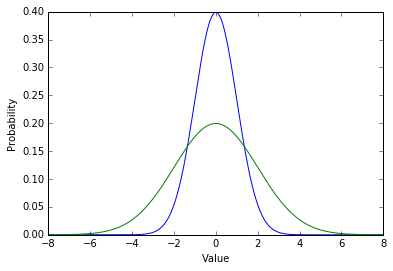

In [13]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

In [ ]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

In [ ]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

In [ ]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

In [ ]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

In [ ]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

In [ ]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

In [ ]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

In [ ]:
start = '2015-01-01'
end = '2016-01-01'
prices = get_pricing('TSLA', fields=['price'], start_date=start, end_date=end)

In [ ]:
# Take the daily returns
returns = prices.pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stats.stattools.jarque_bera(returns)
print "The JB test p-value is: ", p_value
print "We reject the hypothesis that the data are normally distributed ", p_value < cutoff
print "The skewness of the returns is: ", skewness
print "The kurtosis of the returns is: ", kurtosis
plt.hist(returns.price, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

In [ ]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns.price)
sample_std_dev = np.std(returns.price)

In [ ]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/(sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns.price, bins = 20, normed = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');